In [126]:
import pandas as pd
df = pd.read_csv("combsort.csv")
df

,N,time,number of swaps
0,100,0,733
1,5100,59,870402
2,10100,169,3022233
3,15100,458,6557712
4,20100,742,13978595
5,25100,1244,19716164
6,30100,1835,27406856
7,35100,2302,36140290
8,40100,3162,51866889
9,45100,4155,61565115


[Text(0.5, 0, 'N'), Text(0, 0.5, 'number of swaps')]

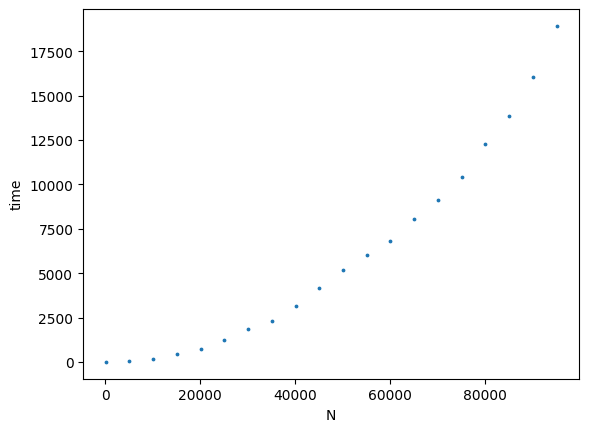

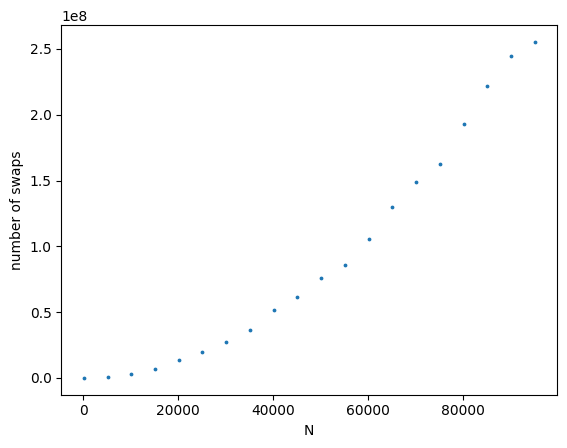

In [127]:
from matplotlib import pyplot as plt
import numpy as np
N = np.array(df["N"])
time = np.array(df["time"])
num = np.array(df['number of swaps'])
fig, ax = plt.subplots()
ax.scatter(N, time, s=3)
ax.set(xlabel='N', ylabel='time')
fig, ax = plt.subplots()
ax.scatter(N, num, s=3)
ax.set(xlabel='N', ylabel='number of swaps')

In [128]:

df2 = pd.read_csv("shellsort.csv")
df2

,N,time_s,numberofswaps_s,time_h,numberofswaps_h,time_f,numberofswaps_f
0,100,7.75,9,7.58,8,12.61,10
1,10100,2106.64,2501,2116.22,2477,2814.79,3147
2,20100,4918.31,6249,4525.32,5530,6000.90,7309
3,30100,7023.90,9347,7279.44,9097,9459.45,11596
4,40100,10001.80,13685,9576.49,12367,12722.90,16116
5,50100,13049.90,19160,12529.80,16785,17125.50,21443
6,60100,16793.70,21778,17110.50,20637,20810.30,26997
7,70100,18456.80,27176,18627.50,25443,24951.40,32801
8,80100,22408.00,30719,22981.50,29309,30727.40,38251
9,90100,27723.90,34556,27173.80,33362,33204.60,44407


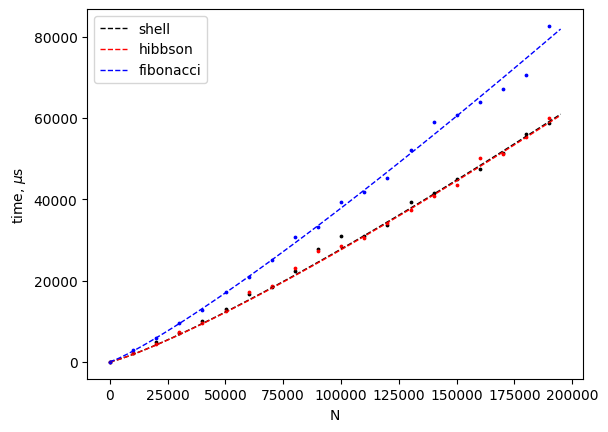

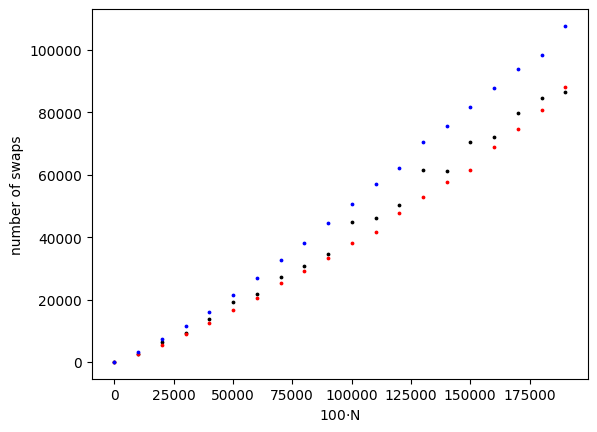

In [132]:
import math
N = np.array(df2["N"])

time_s = np.array(df2["time_s"])
time_h = np.array(df2["time_h"])
time_f = np.array(df2["time_f"])

numberofswaps_s = np.array(df2["numberofswaps_s"])
numberofswaps_h = np.array(df2["numberofswaps_h"])
numberofswaps_f = np.array(df2["numberofswaps_f"])

logN = [math.log(n) for n in N]

logts = [math.log(n) for n in time_s]
logth = [math.log(n) for n in time_h]
logtf = [math.log(n) for n in time_f]

fig, ax = plt.subplots()
ax.scatter(N, time_s, s=3, color='black')
ax.scatter(N, time_h, s=3, color='red')
ax.scatter(N, time_f, s=3, color='blue')
ax.set(xlabel='N', ylabel='time, $\mu$s')

x = np.linspace(0, 195000)
ys = (x**1.178039)/28
yh = x**1.180563/29
yf = x**1.156355/16
line1, = ax.plot(x, ys, color='black', linestyle='--', linewidth=1)
line2, = ax.plot(x, yh, color='red', linestyle='--', linewidth=1)
line3, = ax.plot(x, yf, color='blue', linestyle='--', linewidth=1)
plt.legend((line1, line2, line3), ["shell", "hibbson", "fibonacci"])

fig, ax = plt.subplots()
ax.scatter(N, numberofswaps_s, s=3, color='black')
ax.scatter(N, numberofswaps_h, s=3, color='red')
ax.scatter(N, numberofswaps_f, s=3, color='blue')
ax.set(xlabel='100$\cdot$N', ylabel='number of swaps')

plt.show()


In [130]:
ed = [1] * len(N)
def srednee(x, y):
    num = 0
    for i in range(len(x)):
        num += x[i]*y[i]
    return num/len(x)
def get_covariation(x, y):
    x, y = np.array(x), np.array(y)
    return srednee(x, y) - srednee(x,ed)*srednee(y, ed)
def get_dispersion(x):
    return get_covariation(x, x)
def mnk(x, y):
    k = get_covariation(x, y)/get_dispersion(x)
    b = srednee(y, ed) - srednee(x, ed) *k
    return (k, b)

1.1780390333080069 1.1805629162479436 1.1563547738330333


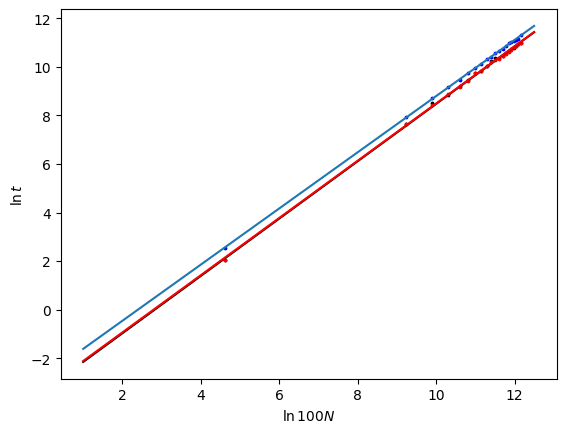

In [131]:
kf, bf = mnk(logN, logtf)
ks, bs = mnk(logN, logts)
kh, bh = mnk(logN, logth)
fig, ax = plt.subplots()
ax.scatter(logN, logts, s=3, color='black')
ax.scatter(logN, logth, s=3, color='red')
ax.scatter(logN, logtf, s=3, color='blue')
ax.set(xlabel='$\ln{100N}$', 
       ylabel='$\ln{t}$')
xp = np.linspace(1, 12.5)
ypf = kf * xp + bf
yps = ks * xp + bs
yph = kh * xp + bh
ax.plot(xp, ypf)
ax.plot(xp, yph, color='black')
ax.plot(xp, yps, color='red')
print(ks, kh, kf) #степени в зависимости t(N) = N^k
plt.show()